Лабораторная работа 1

In [3]:
import pandas as pd
dataset = pd.read_csv("books.csv", on_bad_lines='skip')

In [9]:
for index, row in dataset.iterrows():
    if row["average_rating"] <= 3:
        dataset = dataset.drop(index)

dataset.index = [index for index in range(len(dataset))]

In [35]:
print(dataset.keys())

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       '  num_pages', 'ratings_count'],
      dtype='object')


In [40]:
dataset.drop(["bookID", "title", "authors"], axis=1, inplace=True)


In [42]:
dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())
dataset = (dataset - dataset.mean()) / dataset.std()

In [44]:
dataset.to_csv("books.csv")

Лабораторная работа 2

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

new_dataset = pd.read_csv("books.csv")

In [48]:
x = np.array(new_dataset["ratings_count"]).reshape(-1, 1)
y = np.array(new_dataset["average_rating"]).reshape(-1, 1)

In [50]:
DEGREES = 2
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 0.9968578283279619


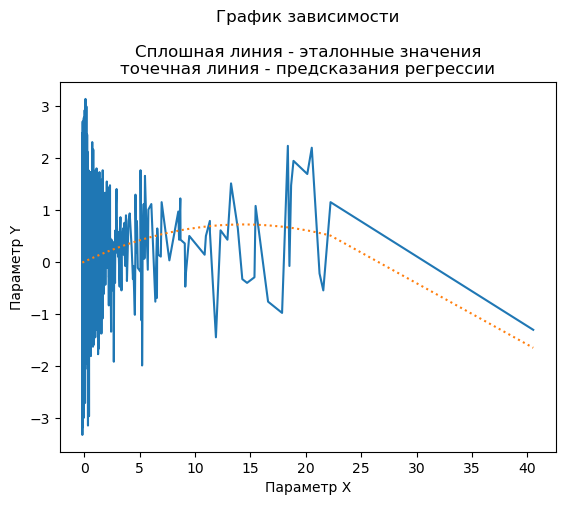

In [56]:
sns.lineplot(
 x=new_dataset["ratings_count"],
 y=new_dataset["average_rating"],
 linestyle="solid"
)
sns.lineplot(
 x=new_dataset["ratings_count"],
 y=predictions.reshape(-1),
 linestyle="dotted"
)
plt.title(
 'График зависимости\n\n'
 'Сплошная линия - эталонные значения\n'
 'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [58]:
x_parameters = np.append(
 regression['linearregression'].intercept_[0],
 regression['linearregression'].coef_[0][1:]
)
x_parameters

array([ 0.00346557,  0.0996554 , -0.00346588])